### Import Libraries

In [1]:
import pandas as pd  # Data Processing, CSV file I/o
import numpy as np  # Linear Algebra
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
data = pd.read_csv('seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [7]:
data.shape

(1461, 6)

In [8]:
# show columns name
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [12]:
# show statistic of numeric data
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [13]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [15]:
data['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

### Data Visualization

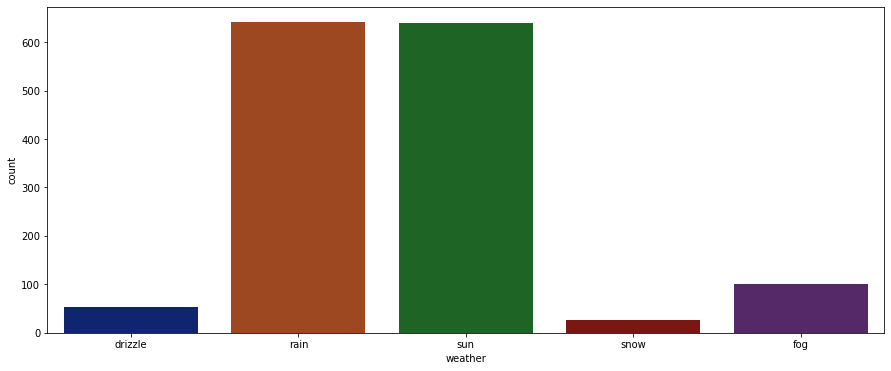

In [17]:
plt.figure(figsize = (15, 6))
sns.countplot('weather', data = data, palette = 'dark')
plt.xticks(rotation = 0)
plt.show()

In [30]:
# show the percentage of the data
count_drizzle = len(data[data.weather == 'drizzle'])
count_rain = len(data[data.weather == 'rain'])
count_sun = len(data[data.weather == 'sun'])
count_snow = len(data[data.weather == 'snow'])
count_fog = len(data[data.weather == 'fog'])
count_weather = len(data['weather'])

print('Precent of drizzle: {:.2%}'.format((count_drizzle/count_weather)))
print('Precent of rain: {:.2%}'.format((count_rain/count_weather)))
print('Precent of sun: {:.2%}'.format((count_sun/count_weather)))
print('Precent of snow: {:.2%}'.format((count_snow/count_weather)))
print('Precent of fog: {:.2%}'.format((count_fog/count_weather)))


Precent of drizzle: 3.63%
Precent of rain: 43.87%
Precent of sun: 43.81%
Precent of snow: 1.78%
Precent of fog: 6.91%


#### distribution of numerical value using Histogram and violin plot 

<AxesSubplot:xlabel='temp_min', ylabel='Count'>

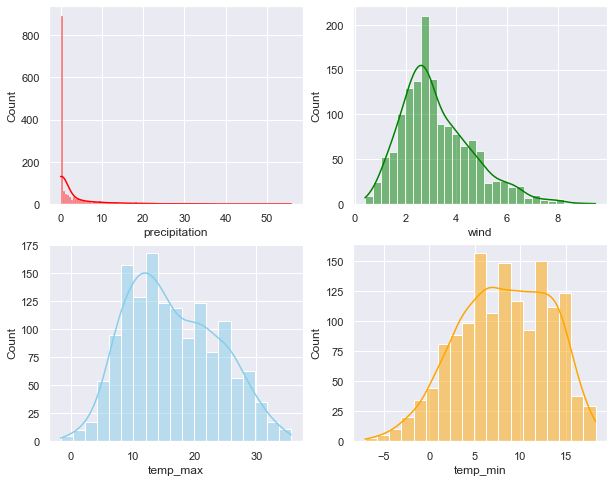

In [37]:
sns.set(style = 'darkgrid')
fig,axs = plt.subplots(2,2, figsize = (10, 8))
sns.histplot(data = data, x = 'precipitation', kde = True, ax = axs[0,0], color = 'red')
sns.histplot(data = data, x = 'wind', kde = True, ax = axs[0,1], color = 'green')
sns.histplot(data = data, x = 'temp_max', kde = True, ax = axs[1,0], color = 'skyblue')
sns.histplot(data = data, x = 'temp_min', kde = True, ax = axs[1,1], color = 'orange')


- below diagram shows the skewness of the data
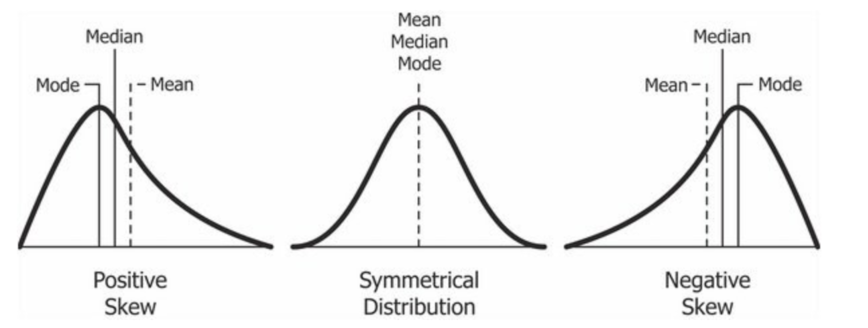

<AxesSubplot:xlabel='temp_min'>

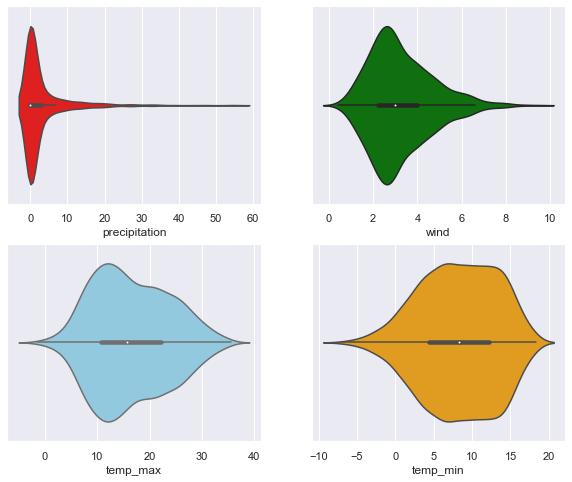

In [39]:
sns.set(style = 'darkgrid')
fig,axs = plt.subplots(2,2, figsize = (10, 8))
sns.violinplot(data = data, x = 'precipitation', kde = True, ax = axs[0,0], color = 'red')
sns.violinplot(data = data, x = 'wind', kde = True, ax = axs[0,1], color = 'green')
sns.violinplot(data = data, x = 'temp_max', kde = True, ax = axs[1,0], color = 'skyblue')
sns.violinplot(data = data, x = 'temp_min', kde = True, ax = axs[1,1], color = 'orange')

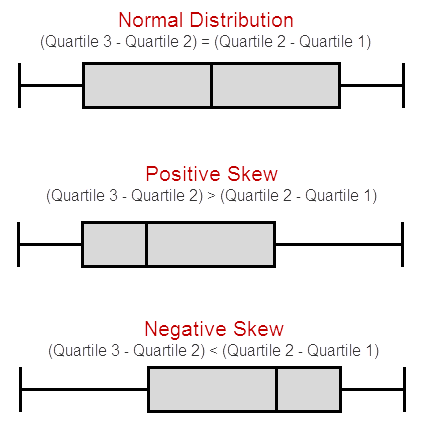

<AxesSubplot:xlabel='precipitation', ylabel='weather'>

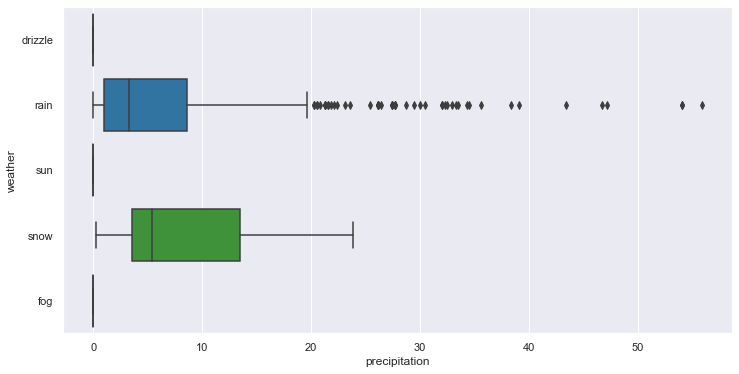

In [41]:
# box plot 
plt.figure(figsize = (12, 6))
sns.boxplot('precipitation', 'weather', data = data, palette = 'Paired')

<AxesSubplot:xlabel='temp_max', ylabel='weather'>

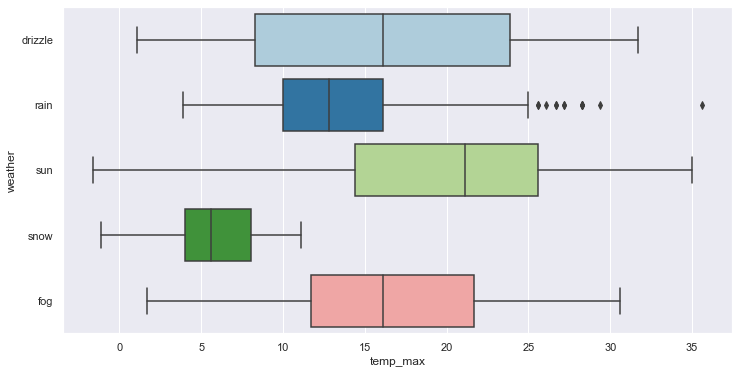

In [43]:
# box plot 
plt.figure(figsize = (12, 6))
sns.boxplot('temp_max', 'weather', data = data, palette = 'Paired')

<AxesSubplot:xlabel='temp_min', ylabel='weather'>

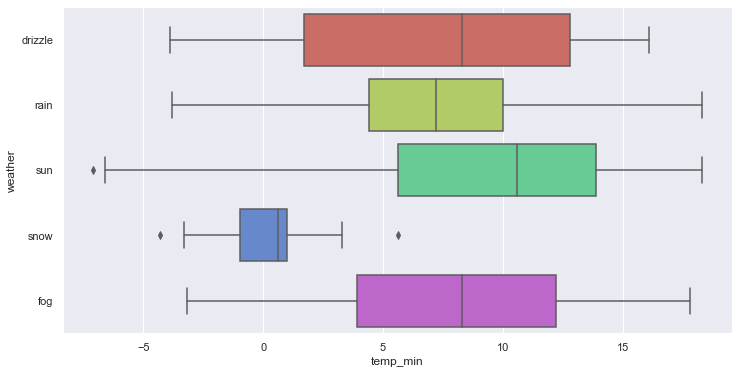

In [47]:
# box plot 
plt.figure(figsize = (12, 6))
sns.boxplot('temp_min', 'weather', data = data, palette = 'hls')

<AxesSubplot:xlabel='wind', ylabel='weather'>

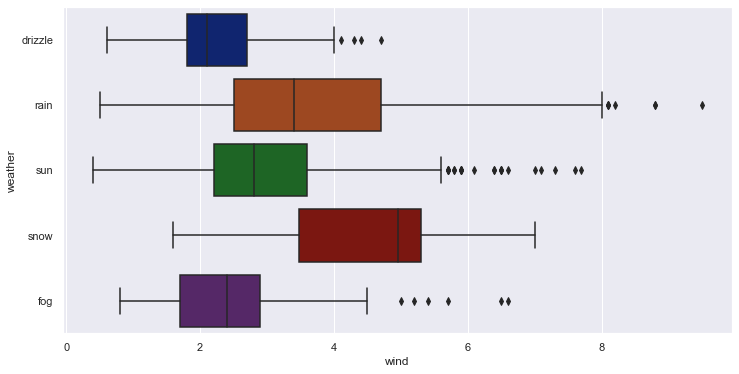

In [45]:
# box plot 
plt.figure(figsize = (12, 6))
sns.boxplot('wind', 'weather', data = data, palette = 'dark')

<AxesSubplot:>

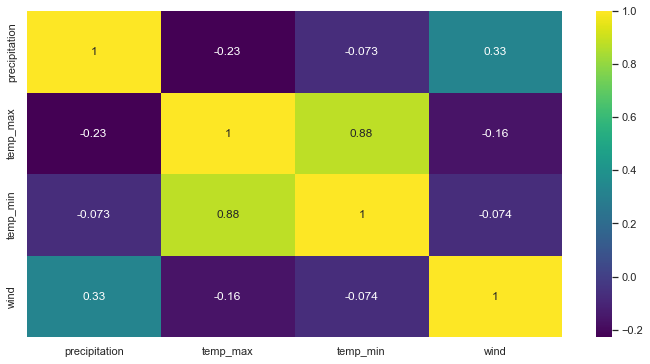

In [50]:
# heatmap
plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

### Splitting data

In [3]:
df = data.drop(columns = 'date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [4]:
# to convert text data into numeric
from sklearn.preprocessing import LabelEncoder

In [5]:
# convert weather into numeric data
lc = LabelEncoder()
df['weather'] = lc.fit_transform(df['weather'])

In [14]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [6]:
df['weather'].unique()

array([0, 2, 4, 3, 1])

In [7]:
x = df.drop(columns = 'weather')
y = df.weather

In [18]:
x.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [27]:
y.head()

0    0
1    2
2    2
3    2
4    2
Name: weather, dtype: int32

In [8]:
# for splitting the data
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.30, random_state=4)

,precipitation,temp_max,temp_min,wind
21,6.1,6.7,2.2,4.8
462,39.1,8.3,5.0,3.9
508,4.1,12.2,6.7,1.9
166,0.0,22.2,9.4,1.7
1119,0.5,14.4,11.1,3.3


### Modeling the data with different ML Technique

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 1. Gradient Boosting Classifier

In [33]:
gbc = GradientBoostingClassifier(subsample = 0.5, n_estimators = 450, max_depth = 5, max_leaf_nodes = 25)
gbc.fit(x_train, y_train)

print('Gradient Boosting Accuracy: {:.2%}'.format(gbc.score(x_test, y_test)))

Gradient Boosting Accuracy: 80.64%


#### 2. Decision Tree Classifier

In [14]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state =  0)
dtc.fit(x_train, y_train)
print('Decsion Tree Accuracy: {:.2%}'.format(dtc.score(x_test, y_test)))

Decsion Tree Accuracy: 74.26%


#### User Input

In [15]:
User_input = [[4.8, 20, 10, 3.9]]
dtc.predict(User_input)

array([2])